In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('data.csv')

## Data Cleaning and Data Preparation for Seizure and Tumor Recognition

In [3]:
for i in range(len(data)):
    if data['y'][i]==1:              #1 is people who have seizure 
        pass
    elif data['y'][i]==2 or data['y'][i]==3: #2 represents people with tumor
        data['y'][i]=2
    else:
        data['y'][i]=0              #0 represents that the person has neither seizure nor tumor

C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1

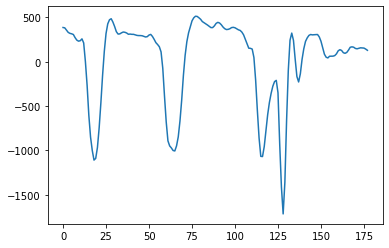

In [4]:
plt.plot(data.values[1][1:-1])
data['y'][1]

C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

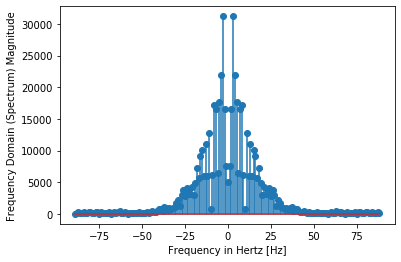

In [5]:
from scipy import fftpack

X = fftpack.fft(data.values[1][1:-1])
freqs = fftpack.fftfreq(178) * 178

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

In [6]:
X=data.iloc[:,1:179].values #Removed all the ID's of patients and the label from the dataset to create the features
Y=data.iloc[:,179:].values #Contains all the  labels(output)

In [7]:
for i in range(len(X)):
    X[i]=fftpack.fft(X[i])

C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


## Machine Learning Models for Classification between Seizure, Tumor, Neither

In [8]:
from sklearn.model_selection import train_test_split
#70% of the data is used for training the neural network and 20% of the data is used for validation of the model
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) 
print("Shape of the training data: ",x_train.shape)
print("Shape of the testing data:  ",x_test.shape)

Shape of the training data:  (9200, 178)
Shape of the testing data:   (2300, 178)


In [9]:
cache={}

### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
dectree=DecisionTreeClassifier(max_depth=7)
dectree.fit(x_train,y_train)
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.7897826086956522
Testing Accuracy: 0.7639130434782608


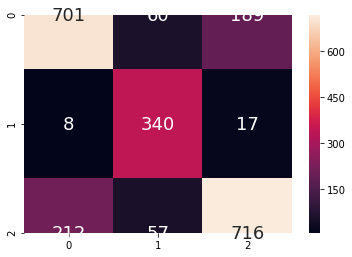

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pred, y_test)

eye_recog_true=cm[0][0]
seizure_recog_true=cm[1][1]
tumor_recog_true=cm[2][2]

eye_recog_false=cm[1][0]+cm[2][0]
seizure_recog_false=cm[1][0]+cm[2][2]
tumor_recog_false=cm[0][2]+cm[1][1]


sb.heatmap(cm,annot = True, fmt=".0f", annot_kws={"size": 18})

In [12]:
#Classification error rates in testing data
False_eye_recog_rate=(cm[0][1]+cm[0][2])/(cm[0][1]+cm[0][2]+cm[0][0])
False_seizure_recog_rate=(cm[1][0]+cm[1][2])/(cm[1][1]+cm[1][2]+cm[1][0])
False_tumor_recog_rate=(cm[2][1]+cm[2][0])/(cm[2][1]+cm[2][2]+cm[2][0])
print("False Positive Rates: ")
print(False_eye_recog_rate,False_seizure_recog_rate,False_tumor_recog_rate)

False Positive Rates: 
0.26210526315789473 0.0684931506849315 0.2730964467005076


In [13]:
#Goodness of fit on testing data
acc=(cm[0][0]+cm[1][1]+cm[2][2])/sum(sum(cm))
print("Goodness of fit: ",round(acc,3))

Goodness of fit:  0.764


In [14]:
cache['Decision Tree']=[metrics.accuracy_score(y_train, y_train_pred),metrics.accuracy_score(y_test, y_test_pred)]

### Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

y_train_pred=nb.predict(x_train)
y_test_pred=nb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Training Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

C:\Users\65905\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8419565217391304
Testing Accuracy: 0.851304347826087


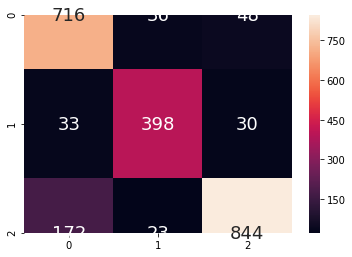

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pred, y_test)

eye_recog_true=cm[0][0]
seizure_recog_true=cm[1][1]
tumor_recog_true=cm[2][2]

eye_recog_false=cm[1][0]+cm[2][0]
seizure_recog_false=cm[1][0]+cm[2][2]
tumor_recog_false=cm[0][2]+cm[1][1]


sb.heatmap(cm,annot = True, fmt=".0f", annot_kws={"size": 18})

In [17]:
#Classification error rates in testing data
False_eye_recog_rate=(cm[0][1]+cm[0][2])/(cm[0][1]+cm[0][2]+cm[0][0])
False_seizure_recog_rate=(cm[1][0]+cm[1][2])/(cm[1][1]+cm[1][2]+cm[1][0])
False_tumor_recog_rate=(cm[2][1]+cm[2][0])/(cm[2][1]+cm[2][2]+cm[2][0])
print("False Positive Rates: ")
print(False_eye_recog_rate,False_seizure_recog_rate,False_tumor_recog_rate)

False Positive Rates: 
0.105 0.13665943600867678 0.18768046198267566


In [18]:
#Goodness of fit on testing data
acc=(cm[0][0]+cm[1][1]+cm[2][2])/sum(sum(cm))
print("Goodness of fit: ",round(acc,3))

Goodness of fit:  0.851


In [19]:
cache['naive bayes'] =[metrics.accuracy_score(y_train, y_train_pred),metrics.accuracy_score(y_test, y_test_pred)]

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=6,random_state=69)

rf.fit(x_train,y_train)

y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Training Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy: 0.8382608695652174
Testing Accuracy: 0.821304347826087


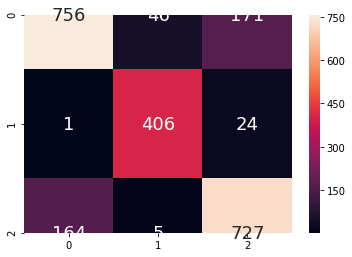

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pred, y_test)

eye_recog_true=cm[0][0]
seizure_recog_true=cm[1][1]
tumor_recog_true=cm[2][2]

eye_recog_false=cm[1][0]+cm[2][0]
seizure_recog_false=cm[1][0]+cm[2][2]
tumor_recog_false=cm[0][2]+cm[1][1]


sb.heatmap(cm,annot = True, fmt=".0f", annot_kws={"size": 18})

In [22]:
#Classification error rates in testing data
False_eye_recog_rate=(cm[0][1]+cm[0][2])/(cm[0][1]+cm[0][2]+cm[0][0])
False_seizure_recog_rate=(cm[1][0]+cm[1][2])/(cm[1][1]+cm[1][2]+cm[1][0])
False_tumor_recog_rate=(cm[2][1]+cm[2][0])/(cm[2][1]+cm[2][2]+cm[2][0])
print("False Positive Rates: ")
print(False_eye_recog_rate,False_seizure_recog_rate,False_tumor_recog_rate)

False Positive Rates: 
0.22302158273381295 0.058004640371229696 0.18861607142857142


In [23]:
#Goodness of fit on testing data
acc=(cm[0][0]+cm[1][1]+cm[2][2])/sum(sum(cm))
print("Goodness of fit: ",round(acc,3))

Goodness of fit:  0.821


In [24]:
cache['Random Forest'] = [metrics.accuracy_score(y_train, y_train_pred),metrics.accuracy_score(y_test, y_test_pred)]

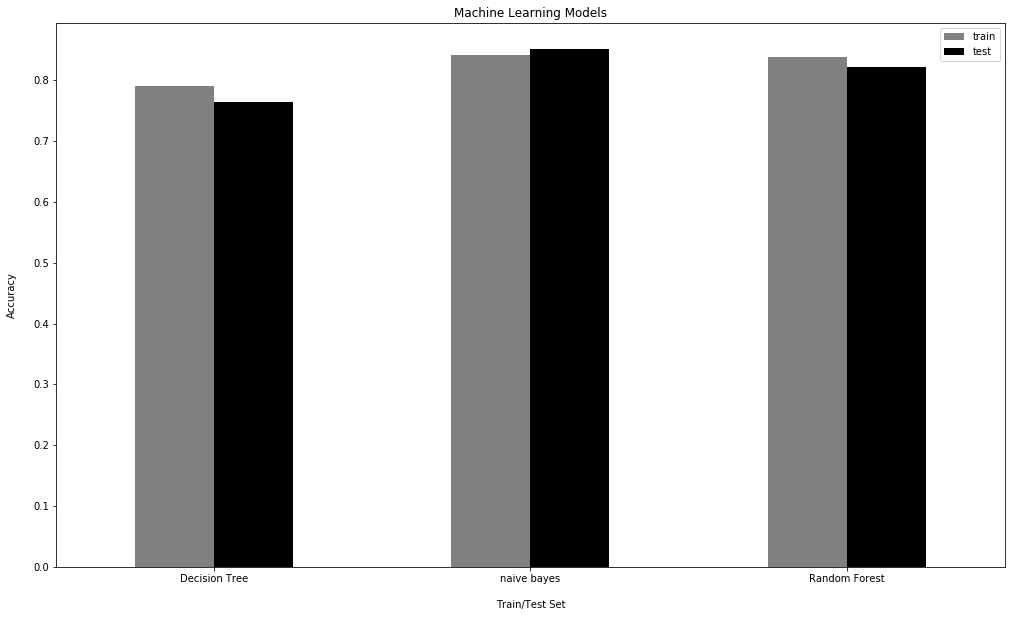

In [25]:
cache=pd.DataFrame(cache).T
cache.columns = ['train', 'test']
cache.plot(kind='bar', figsize=(17, 10), color=['gray', 'black'], rot=0)                                       
plt.title("Machine Learning Models")
plt.xlabel("Train/Test Set", labelpad=16)
plt.ylabel("Accuracy", labelpad=16)
print()

### We can infer that Naive Bayes is the best model with an accuracy of 85-87%.  To increase the accuracy and predict whether a person has Seizure or not, built a Neural Network to classify as Seizure or not

In [26]:
for i in range(len(Y)):
    if Y[i]==2:
        Y[i]=0
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
model=Sequential()
model.add(Dense(output_dim = 89,  activation = 'relu', input_dim = 178))
model.add(Dense(output_dim = 44,  activation = 'relu'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 89)                15931     
_________________________________________________________________
dense_2 (Dense)              (None, 44)                3960      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 45        
Total params: 19,936
Trainable params: 19,936
Non-trainable params: 0
_________________________________________________________________


C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=89)`
  
C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=44)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  after removing the cwd from sys.path.


In [29]:
history=model.fit(x_train, y_train, batch_size = 13, epochs = 10,validation_data=(x_test,y_test))

Train on 9200 samples, validate on 2300 samples
Epoch 1/10
9200/9200 [==============================] - 1s 153us/step - loss: 55.7701 - accuracy: 0.6938 - val_loss: 26.4201 - val_accuracy: 0.6996
Epoch 2/10
9200/9200 [==============================] - 1s 126us/step - loss: 17.2963 - accuracy: 0.7528 - val_loss: 17.7194 - val_accuracy: 0.7378
Epoch 3/10
9200/9200 [==============================] - 1s 146us/step - loss: 9.0229 - accuracy: 0.7736 - val_loss: 9.4265 - val_accuracy: 0.7696
Epoch 4/10
9200/9200 [==============================] - 1s 137us/step - loss: 4.4493 - accuracy: 0.7978 - val_loss: 5.1308 - val_accuracy: 0.7739
Epoch 5/10
9200/9200 [==============================] - 1s 163us/step - loss: 1.9702 - accuracy: 0.8221 - val_loss: 2.4614 - val_accuracy: 0.8391
Epoch 6/10
9200/9200 [==============================] - 1s 155us/step - loss: 0.6009 - accuracy: 0.8841 - val_loss: 0.6611 - val_accuracy: 0.8639
Epoch 7/10
9200/9200 [==============================] - 2s 163us/step - 

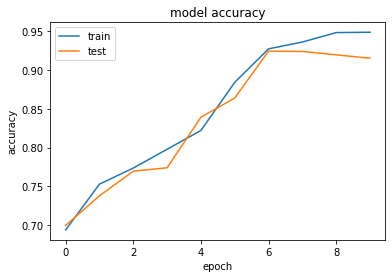

In [30]:
#Accuracy on both the train and test data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

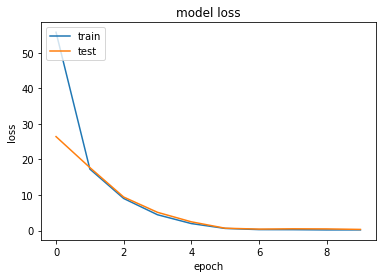

In [31]:
#Loss on both the train and test data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### With this, we were able to predict whether a person has seizure or not with an accuracy of 91-93% which is higher than the Naive Bayes method. Thus, this model is the most suitable to for Seizure Recognition